# Project: Boston and Seattle Airbnb

> For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from AirBnB available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data.

I chose Airbnb data in Boston and Seattle, and have the following three questions:

- What is the seasonal pattern of Airbnb in Boston and Seattle?

- Is there any kinds of difference between Seattle and Boston Airbnb?

- What are the influencial features about the rental price?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
b_cal = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Boston_and_Seattle_Airbnb/data/boston/calendar.csv')
b_lst = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Boston_and_Seattle_Airbnb/data/boston/listings.csv')
b_rev = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Boston_and_Seattle_Airbnb/data/boston/reviews.csv')

s_cal = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Boston_and_Seattle_Airbnb/data/seattle/calendar.csv')
s_lst = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Boston_and_Seattle_Airbnb/data/seattle/listings.csv')
s_rev = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Boston_and_Seattle_Airbnb/data/seattle/reviews.csv')

## Data understanding

In [3]:
b_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
s_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
b_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
s_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
b_lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
s_lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
b_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [10]:
s_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [11]:
b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [12]:
s_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
b_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
s_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Seasonal pattern 

In [15]:
b_cal['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [16]:
s_cal['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [17]:
# convert 'available' into binary
b_cal['available'] = b_cal['available'].map(lambda available: 1 if available == 't' else 0)
s_cal['available'] = s_cal['available'].map(lambda available: 1 if available == 't' else 0)

In [18]:
# check
print(b_cal['available'].value_counts())
print(s_cal['available'].value_counts())

0    665853
1    643037
Name: available, dtype: int64
1    934542
0    459028
Name: available, dtype: int64


In [19]:
# convert 'price' into float
b_cal['price'] = b_cal['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
s_cal['price'] = s_cal['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

In [20]:
# check
display(b_cal.describe())
display(s_cal.describe())

,listing_id,available,price
count,1.308890e+06,1.308890e+06,643037.000000
mean,8.442118e+06,4.912842e-01,198.438909
std,4.500149e+06,4.999242e-01,180.142913
min,3.353000e+03,0.000000e+00,11.000000
25%,4.679319e+06,0.000000e+00,85.000000
50%,8.578710e+06,0.000000e+00,150.000000
75%,1.279603e+07,1.000000e+00,255.000000
max,1.493346e+07,1.000000e+00,7163.000000


,listing_id,available,price
count,1.393570e+06,1.393570e+06,934542.000000
mean,5.550111e+06,6.706100e-01,137.944859
std,2.962274e+06,4.699919e-01,105.062870
min,3.335000e+03,0.000000e+00,10.000000
25%,3.258213e+06,0.000000e+00,75.000000
50%,6.118244e+06,1.000000e+00,109.000000
75%,8.035212e+06,1.000000e+00,160.000000
max,1.034016e+07,1.000000e+00,1650.000000


In [21]:
# get daily occupancy rate
b_ocp = b_cal[['date', 'available']].groupby('date').mean()
s_ocp = s_cal[['date', 'available']].groupby('date').mean()
b_ocp.rename(columns={'available':'occupancy'}, inplace = True)
s_ocp.rename(columns={'available':'occupancy'}, inplace = True)

In [22]:
# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

In [23]:
def timeplot(data, feat, title):
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(title)
    
    plt.plot(x, y_smooth, 'c-')
    plt.show()

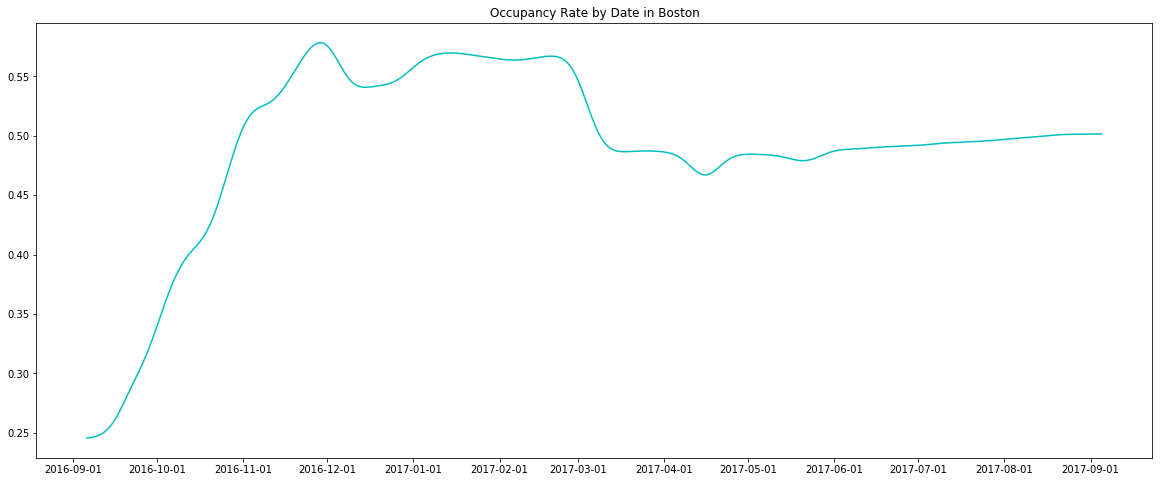

In [24]:
timeplot(b_ocp, 'occupancy', 'Occupancy Rate by Date in Boston')

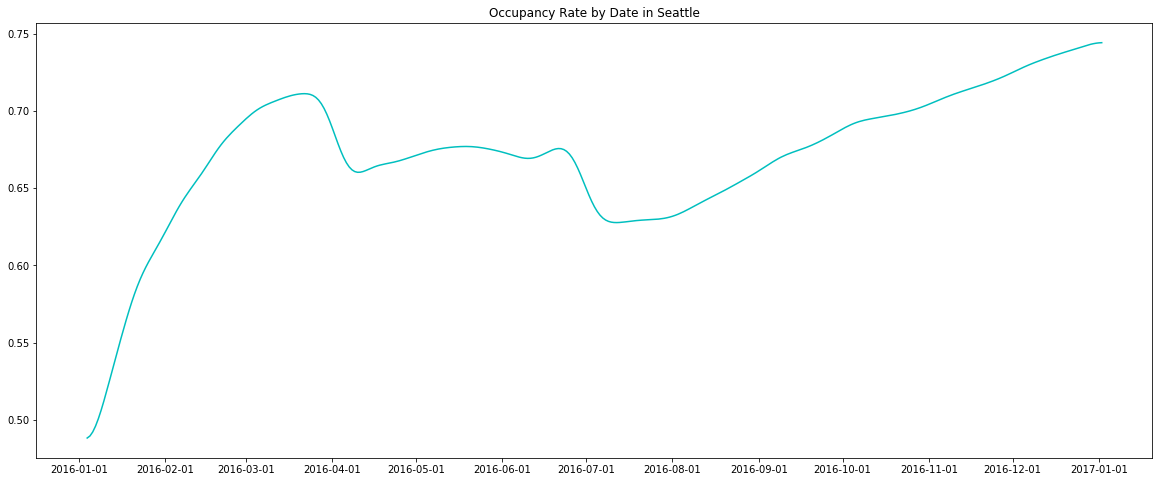

In [25]:
timeplot(s_ocp, 'occupancy', 'Occupancy Rate by Date in Seattle')

In [26]:
b_pri = b_cal[['date', 'price']].groupby('date').median()
s_pri = s_cal[['date', 'price']].groupby('date').median()

In [27]:
b_ocp.head()

,occupancy
date,
2016-09-06,0.158951
2016-09-07,0.259900
2016-09-08,0.278583
2016-09-09,0.273564
2016-09-10,0.266592


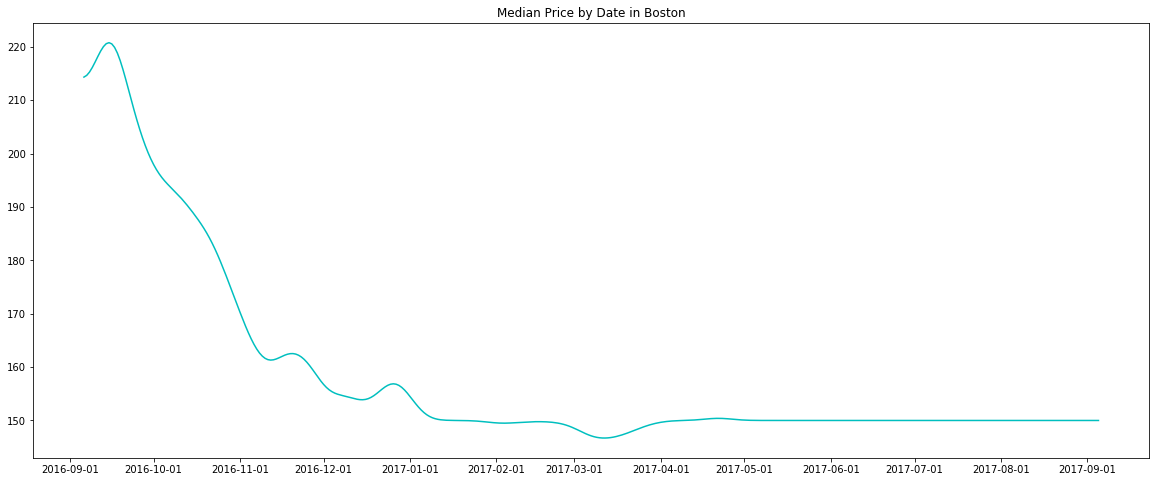

In [28]:
timeplot(b_pri, 'price', 'Median Price by Date in Boston')

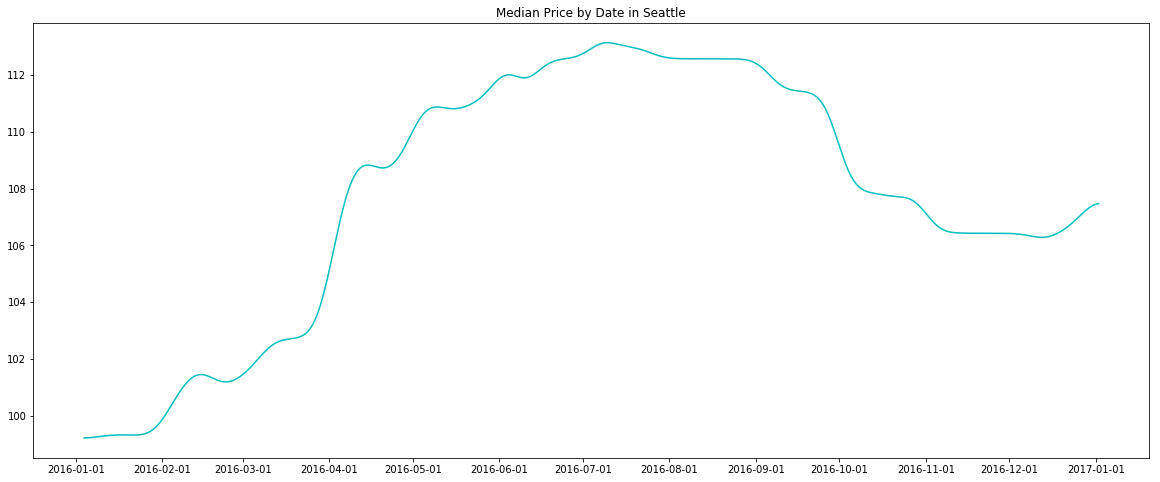

In [29]:
timeplot(s_pri, 'price', 'Median Price by Date in Seattle')